# Setup

Below will import the `modelPUF` modules to setup the CRPs and make a PUF model from the `modelPUF.py` script.

Also, add any other library here that you may need to import.

In [1]:
from modelPUF import *
import numpy as np
import scipy.spatial as spatial
import matplotlib.pyplot as plt

2022-10-01 07:02:36.547382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-01 07:02:36.547403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# PUF Modeling

We will be modeling each of your FPGAs. Go through the `modelPUF.py` script and see how to interface with the model. You need to model it using the resp files from Lab 01, select one (any) for each FPGA.

Since we are going to train and test the model many times, make a function that will setup the CRP, model, train, test, and get it's accuracy for a given dataset percent `p` for training.


In [2]:
'''
Function: get_accuracy()
  Input: 'cfile' - challanges file name
  Input: 'rfile' - responses file name
  Input: 'p' - percentage of data to use for training
  Output: 'accuracy' - model accuracy
'''

def get_accuracy(cfile: str, rfile: str, p: float) -> float:
    crpData = ChallengeResponseSet(cfile, rfile)
    crpData.train_test_split(p)
    pufmodel = pufModel(crpData)
    pufmodel.train(crpData)
    accuracy = pufmodel.test(crpData)
    return accuracy

Test your function. Note: this may take a while, so test with a small file (such as the 5k).

In [3]:
challenges = "../Challenges/challenges_50k.npz"
response_fpga0 = "../Responses/fpga0_resp1_bitfile1_alec_50k.npz"
response_fpga1 = "../Responses/fpga1_resp1_bitfile1_jasmin_50k.npz"

data = np.load("../Responses/fpga0_resp1_bitfile1_alec_50k.npz")
fpga0_resp = data['response']

data = np.load("../Responses/fpga1_resp1_bitfile1_jasmin_50k.npz")
fpga1_resp = data['response']



    
get_accuracy(challenges, response_fpga0, 0.5)

2022-10-01 07:02:38.327231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-01 07:02:38.327251: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-01 07:02:38.327263: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PHS-VM): /proc/driver/nvidia/version does not exist
2022-10-01 07:02:38.327427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Accuracy on 25000 unseen challenges is: 0.7105200290679932


0.7105200290679932

# 2 BIT XOR and 4 BIT XOR FUNCTIONS

Create functions that will 2BIT XOR and 4BIT XOR the response files for this lab

In [4]:
def TWO_BIT_XOR(response):
    fpga0_resp_2XOR = []
    
    for i in range(len(response)):
        j = 0
        k = 0
        xor_string = ""
        while j < len(response[i]):
            xor_string = xor_string + str(int(response[i][j]) ^ int(response[i][j + 1]))
            k=k+1
            j=j+2
        fpga0_resp_2XOR.append(xor_string)
    return fpga0_resp_2XOR


def FOUR_BIT_XOR(response):
    fpga0_resp_4XOR = []
    
    for i in range(len(response)):
        j = 0
        k = 0
        xor_string = ""
        while j < len(response[i]):
            xor_string = xor_string + str(int(response[i][j]) ^ int(response[i][j + 1]) ^ int(response[i][j + 2]) ^ int(response[i][j + 3]))
            k=k+1
            j=j+4
        fpga0_resp_4XOR.append(xor_string)
    return fpga0_resp_4XOR

# XOR the Response Files' Outputs

In [5]:
response_fpga0_2bit_xor = TWO_BIT_XOR(fpga0_resp)
response_fpga1_2bit_xor = TWO_BIT_XOR(fpga1_resp)

response_fpga0_4bit_xor = FOUR_BIT_XOR(fpga0_resp)
response_fpga1_4bit_xor = FOUR_BIT_XOR(fpga1_resp)

    
# Convert Lists to NP Arrays and save the npz files
np_response_fpga0_2bit_xor = np.asarray(response_fpga0_2bit_xor)
out_filename = "../Responses/fpga0_resp1_bitfile1_alec_50k_2bit_xor.npz"
np.savez(out_filename, response=np_response_fpga0_2bit_xor)

np_response_fpga1_2bit_xor = np.asarray(response_fpga1_2bit_xor)
out_filename = "../Responses/fpga1_resp1_bitfile1_jasmin_50k_2bit_xor.npz"
np.savez(out_filename, response=np_response_fpga1_2bit_xor)

np_response_fpga0_4bit_xor = np.asarray(response_fpga0_4bit_xor)
out_filename = "../Responses/fpga0_resp1_bitfile1_alec_50k_4bit_xor.npz"
np.savez(out_filename, response=np_response_fpga0_4bit_xor)

np_response_fpga1_4bit_xor = np.asarray(response_fpga1_4bit_xor)
out_filename = "../Responses/fpga1_resp1_bitfile1_jasmin_50k_4bit_xor.npz"
np.savez(out_filename, response=np_response_fpga1_4bit_xor)

print("Done")

Done


Use the XOR'd response files along with the challenge data to train the model.

In [6]:
challenges = "../Challenges/challenges_50k.npz"
response_fpga0_2bit_xor = "../Responses/fpga0_resp1_bitfile1_alec_50k_2bit_xor.npz"
response_fpga1_2bit_xor = "../Responses/fpga1_resp1_bitfile1_jasmin_50k_2bit_xor.npz"
response_fpga0_4bit_xor = "../Responses/fpga0_resp1_bitfile1_alec_50k_4bit_xor.npz"
response_fpga1_4bit_xor = "../Responses/fpga1_resp1_bitfile1_jasmin_50k_4bit_xor.npz"


#Experiment 1
accuracy_list_fpga0_2bit_xor_exp1 = []
accuracy_list_fpga1_2bit_xor_exp1 = []
accuracy_list_fpga0_4bit_xor_exp1 = []
accuracy_list_fpga1_4bit_xor_exp1 = []

#Experiment 2
accuracy_list_fpga0_2bit_xor_exp2 = []
accuracy_list_fpga1_2bit_xor_exp2 = []
accuracy_list_fpga0_4bit_xor_exp2 = []
accuracy_list_fpga1_4bit_xor_exp2 = []

#Experiment 3
accuracy_list_fpga0_2bit_xor_exp3 = []
accuracy_list_fpga1_2bit_xor_exp3 = []
accuracy_list_fpga0_4bit_xor_exp3 = []
accuracy_list_fpga1_4bit_xor_exp3 = []


i=1

print("Accuracy of 2BIT XOR'd crp pairs")

while i <= 19:  
    
    # Accuracies of 2 Bit XOR'd Response Files
    accuracy_list_fpga0_2bit_xor_exp1.append(get_accuracy(challenges, response_fpga0_2bit_xor, i/20))
    accuracy_list_fpga1_2bit_xor_exp1.append(get_accuracy(challenges, response_fpga1_2bit_xor, i/20))
    accuracy_list_fpga0_2bit_xor_exp2.append(get_accuracy(challenges, response_fpga0_2bit_xor, i/20))
    accuracy_list_fpga1_2bit_xor_exp2.append(get_accuracy(challenges, response_fpga1_2bit_xor, i/20))
    accuracy_list_fpga0_2bit_xor_exp3.append(get_accuracy(challenges, response_fpga0_2bit_xor, i/20))
    accuracy_list_fpga1_2bit_xor_exp3.append(get_accuracy(challenges, response_fpga1_2bit_xor, i/20))
    
    i=i+1
    
    
i=1

print("Accuracy of 4BIT XOR'd crp pairs")

while i <= 19:     

    # Accuracies of 4 Bit XOR'd Response Files
    accuracy_list_fpga0_4bit_xor_exp1.append(get_accuracy(challenges, response_fpga0_4bit_xor, i/20))
    accuracy_list_fpga1_4bit_xor_exp1.append(get_accuracy(challenges, response_fpga1_4bit_xor, i/20))
    accuracy_list_fpga0_4bit_xor_exp2.append(get_accuracy(challenges, response_fpga0_4bit_xor, i/20))
    accuracy_list_fpga1_4bit_xor_exp2.append(get_accuracy(challenges, response_fpga1_4bit_xor, i/20))
    accuracy_list_fpga0_4bit_xor_exp3.append(get_accuracy(challenges, response_fpga0_4bit_xor, i/20))
    accuracy_list_fpga1_4bit_xor_exp3.append(get_accuracy(challenges, response_fpga1_4bit_xor, i/20))
    
    i=i+1



Accuracy of 2BIT XOR'd crp pairs
Accuracy on 47500 unseen challenges is: 0.6859157681465149
Accuracy on 47500 unseen challenges is: 0.674463152885437
Accuracy on 47500 unseen challenges is: 0.6850526332855225
Accuracy on 47500 unseen challenges is: 0.6569473743438721
Accuracy on 47500 unseen challenges is: 0.6902315616607666
Accuracy on 47500 unseen challenges is: 0.6636631488800049
Accuracy on 45000 unseen challenges is: 0.7046666741371155
Accuracy on 45000 unseen challenges is: 0.7010889053344727
Accuracy on 45000 unseen challenges is: 0.6868000030517578
Accuracy on 45000 unseen challenges is: 0.7146444320678711
Accuracy on 45000 unseen challenges is: 0.690488874912262
Accuracy on 45000 unseen challenges is: 0.6768666505813599
Accuracy on 42500 unseen challenges is: 0.707341194152832


2022-10-01 07:03:23.623990: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 42500 unseen challenges is: 0.6759764552116394
Accuracy on 42500 unseen challenges is: 0.7076941132545471
Accuracy on 42500 unseen challenges is: 0.7132235169410706
Accuracy on 42500 unseen challenges is: 0.7282353043556213
Accuracy on 42500 unseen challenges is: 0.6763529181480408
Accuracy on 40000 unseen challenges is: 0.7063500285148621
Accuracy on 40000 unseen challenges is: 0.7109500169754028
Accuracy on 40000 unseen challenges is: 0.6899250149726868
Accuracy on 40000 unseen challenges is: 0.6576250195503235
Accuracy on 40000 unseen challenges is: 0.6896499991416931
Accuracy on 40000 unseen challenges is: 0.7149249911308289
Accuracy on 37500 unseen challenges is: 0.7231199741363525
Accuracy on 37500 unseen challenges is: 0.6763200163841248


2022-10-01 07:04:07.384515: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 37500 unseen challenges is: 0.7315199971199036
Accuracy on 37500 unseen challenges is: 0.7017333507537842
Accuracy on 37500 unseen challenges is: 0.7311466932296753
Accuracy on 37500 unseen challenges is: 0.6738933324813843
Accuracy on 35000 unseen challenges is: 0.7095999717712402
Accuracy on 35000 unseen challenges is: 0.7193142771720886
Accuracy on 35000 unseen challenges is: 0.730657160282135
Accuracy on 35000 unseen challenges is: 0.7055428624153137
Accuracy on 35000 unseen challenges is: 0.6890000104904175


2022-10-01 07:04:50.133937: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 35000 unseen challenges is: 0.6755714416503906
Accuracy on 32500 unseen challenges is: 0.7311692237854004
Accuracy on 32500 unseen challenges is: 0.7189230918884277
Accuracy on 32500 unseen challenges is: 0.6918769478797913
Accuracy on 32500 unseen challenges is: 0.7134153842926025
Accuracy on 32500 unseen challenges is: 0.6908307671546936
Accuracy on 32500 unseen challenges is: 0.7187076807022095
Accuracy on 30000 unseen challenges is: 0.6873666644096375


2022-10-01 07:05:38.820874: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 30000 unseen challenges is: 0.7184000015258789
Accuracy on 30000 unseen challenges is: 0.7085333466529846
Accuracy on 30000 unseen challenges is: 0.6606000065803528
Accuracy on 30000 unseen challenges is: 0.6906333565711975
Accuracy on 30000 unseen challenges is: 0.7136333584785461
Accuracy on 27500 unseen challenges is: 0.7242545485496521
Accuracy on 27500 unseen challenges is: 0.7041454315185547
Accuracy on 27500 unseen challenges is: 0.7331272959709167
Accuracy on 27500 unseen challenges is: 0.7176363468170166
Accuracy on 27500 unseen challenges is: 0.7282909154891968
Accuracy on 27500 unseen challenges is: 0.7270908951759338
Accuracy on 25000 unseen challenges is: 0.7240399718284607


2022-10-01 07:06:34.575260: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 25000 unseen challenges is: 0.7181599736213684
Accuracy on 25000 unseen challenges is: 0.7258800268173218
Accuracy on 25000 unseen challenges is: 0.7174400091171265
Accuracy on 25000 unseen challenges is: 0.7211999893188477
Accuracy on 25000 unseen challenges is: 0.7172799706459045
Accuracy on 22500 unseen challenges is: 0.7271999716758728
Accuracy on 22500 unseen challenges is: 0.7262666821479797
Accuracy on 22500 unseen challenges is: 0.6922666430473328


2022-10-01 07:07:25.564133: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 22500 unseen challenges is: 0.716533362865448
Accuracy on 22500 unseen challenges is: 0.7084444165229797
Accuracy on 22500 unseen challenges is: 0.7155555486679077
Accuracy on 20000 unseen challenges is: 0.7299000024795532
Accuracy on 20000 unseen challenges is: 0.6765000224113464
Accuracy on 20000 unseen challenges is: 0.7264999747276306
Accuracy on 20000 unseen challenges is: 0.7218000292778015
Accuracy on 20000 unseen challenges is: 0.687749981880188
Accuracy on 20000 unseen challenges is: 0.729449987411499
Accuracy on 17500 unseen challenges is: 0.7224000096321106
Accuracy on 17500 unseen challenges is: 0.7201142907142639
Accuracy on 17500 unseen challenges is: 0.6908000111579895
Accuracy on 17500 unseen challenges is: 0.7241142988204956
Accuracy on 17500 unseen challenges is: 0.7225714325904846
Accuracy on 17500 unseen challenges is: 0.7219428420066833
Accuracy on 15000 unseen challenges is: 0.7303333282470703
Accuracy on 15000 unseen challenges is: 0.6708666682243347


2022-10-01 07:13:18.272115: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 42500 unseen challenges is: 0.5756941437721252
Accuracy on 42500 unseen challenges is: 0.5696941018104553
Accuracy on 42500 unseen challenges is: 0.5729411840438843
Accuracy on 42500 unseen challenges is: 0.5668705701828003
Accuracy on 42500 unseen challenges is: 0.5770588517189026
Accuracy on 42500 unseen challenges is: 0.5671058893203735
Accuracy on 40000 unseen challenges is: 0.5787749886512756
Accuracy on 40000 unseen challenges is: 0.5733000040054321
Accuracy on 40000 unseen challenges is: 0.5741000175476074
Accuracy on 40000 unseen challenges is: 0.5716249942779541
Accuracy on 40000 unseen challenges is: 0.5802000164985657
Accuracy on 40000 unseen challenges is: 0.5619750022888184
Accuracy on 37500 unseen challenges is: 0.5814399719238281
Accuracy on 37500 unseen challenges is: 0.576906681060791
Accuracy on 37500 unseen challenges is: 0.5917333364486694
Accuracy on 37500 unseen challenges is: 0.5684000253677368
Accuracy on 37500 unseen challenges is: 0.579253315925598

2022-10-01 07:14:29.750437: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 35000 unseen challenges is: 0.5785142779350281
Accuracy on 35000 unseen challenges is: 0.5693714022636414
Accuracy on 32500 unseen challenges is: 0.5854769349098206
Accuracy on 32500 unseen challenges is: 0.5782153606414795
Accuracy on 32500 unseen challenges is: 0.5914154052734375
Accuracy on 32500 unseen challenges is: 0.5692923069000244
Accuracy on 32500 unseen challenges is: 0.5778461694717407
Accuracy on 32500 unseen challenges is: 0.5684307813644409
Accuracy on 30000 unseen challenges is: 0.5808666944503784
Accuracy on 30000 unseen challenges is: 0.5788000226020813
Accuracy on 30000 unseen challenges is: 0.5934666395187378
Accuracy on 30000 unseen challenges is: 0.5721333622932434
Accuracy on 30000 unseen challenges is: 0.5897666811943054
Accuracy on 30000 unseen challenges is: 0.574733316898346
Accuracy on 27500 unseen challenges is: 0.5846545696258545
Accuracy on 27500 unseen challenges is: 0.5734182000160217
Accuracy on 27500 unseen challenges is: 0.587636351585388

2022-10-01 07:20:15.767902: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 7500 unseen challenges is: 0.5974666476249695
Accuracy on 7500 unseen challenges is: 0.5882666707038879
Accuracy on 7500 unseen challenges is: 0.5803999900817871
Accuracy on 7500 unseen challenges is: 0.5856000185012817
Accuracy on 5000 unseen challenges is: 0.5952000021934509
Accuracy on 5000 unseen challenges is: 0.58160001039505
Accuracy on 5000 unseen challenges is: 0.5916000008583069
Accuracy on 5000 unseen challenges is: 0.5881999731063843


2022-10-01 07:21:25.345164: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 5000 unseen challenges is: 0.5971999764442444


2022-10-01 07:21:32.075819: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


Accuracy on 5000 unseen challenges is: 0.5802000164985657
Accuracy on 2500 unseen challenges is: 0.5856000185012817
Accuracy on 2500 unseen challenges is: 0.5727999806404114
Accuracy on 2500 unseen challenges is: 0.5960000157356262
Accuracy on 2500 unseen challenges is: 0.579200029373169
Accuracy on 2500 unseen challenges is: 0.5943999886512756
Accuracy on 2500 unseen challenges is: 0.5687999725341797


# Statistical Results

Prints the following stats values for each model accuracy list (FPGA0 and FPGA1): min, max, average, and standard deviation (StD). NumPy have functions to compute all these.

Also, print the sample size (n) of the collected data (i.e., the length of each list).

In [17]:
# Experiment 1
nparray_experiment1_fpga0_2bit_xor = np.asarray(accuracy_list_fpga0_2bit_xor_exp1)
nparray_experiment1_fpga1_2bit_xor = np.asarray(accuracy_list_fpga1_2bit_xor_exp1)
nparray_experiment1_fpga0_4bit_xor = np.asarray(accuracy_list_fpga0_4bit_xor_exp1)
nparray_experiment1_fpga1_4bit_xor = np.asarray(accuracy_list_fpga1_4bit_xor_exp1)

print("FPGA0 Experiment 1 2BIT XOR Accuracy List :","Min:", np.min(nparray_experiment1_fpga0_2bit_xor), "Max:", np.max(nparray_experiment1_fpga0_2bit_xor), "Average:", np.average(nparray_experiment1_fpga0_2bit_xor), "StD", np.std(nparray_experiment1_fpga0_2bit_xor), "Length", len(nparray_experiment1_fpga0_2bit_xor))
print("FPGA1 Experiment 1 2BIT XOR Accuracy List :","Min:", np.min(nparray_experiment1_fpga1_2bit_xor), "Max:", np.max(nparray_experiment1_fpga1_2bit_xor), "Average:", np.average(nparray_experiment1_fpga1_2bit_xor), "StD", np.std(nparray_experiment1_fpga1_2bit_xor), "Length", len(nparray_experiment1_fpga1_2bit_xor))
print("FPGA0 Experiment 1 4BIT XOR Accuracy List :","Min:", np.min(nparray_experiment1_fpga0_4bit_xor), "Max:", np.max(nparray_experiment1_fpga0_4bit_xor), "Average:", np.average(nparray_experiment1_fpga0_4bit_xor), "StD", np.std(nparray_experiment1_fpga0_4bit_xor), "Length", len(nparray_experiment1_fpga0_4bit_xor))
print("FPGA1 Experiment 1 4BIT XOR Accuracy List :","Min:", np.min(nparray_experiment1_fpga1_4bit_xor), "Max:", np.max(nparray_experiment1_fpga1_4bit_xor), "Average:", np.average(nparray_experiment1_fpga1_4bit_xor), "StD", np.std(nparray_experiment1_fpga1_4bit_xor), "Length", len(nparray_experiment1_fpga1_4bit_xor))


# Experiment 2
nparray_experiment2_fpga0_2bit_xor = np.asarray(accuracy_list_fpga0_2bit_xor_exp2)
nparray_experiment2_fpga1_2bit_xor = np.asarray(accuracy_list_fpga1_2bit_xor_exp2)
nparray_experiment2_fpga0_4bit_xor = np.asarray(accuracy_list_fpga0_4bit_xor_exp2)
nparray_experiment2_fpga1_4bit_xor = np.asarray(accuracy_list_fpga1_4bit_xor_exp2)

print("FPGA0 Experiment 2 2BIT XOR Accuracy List :","Min:", np.min(nparray_experiment2_fpga0_2bit_xor), "Max:", np.max(nparray_experiment2_fpga0_2bit_xor), "Average:", np.average(nparray_experiment2_fpga0_2bit_xor), "StD", np.std(nparray_experiment2_fpga0_2bit_xor), "Length", len(nparray_experiment2_fpga0_2bit_xor))
print("FPGA1 Experiment 2 2BIT XOR Accuracy List :","Min:", np.min(nparray_experiment2_fpga1_2bit_xor), "Max:", np.max(nparray_experiment2_fpga1_2bit_xor), "Average:", np.average(nparray_experiment2_fpga1_2bit_xor), "StD", np.std(nparray_experiment2_fpga1_2bit_xor), "Length", len(nparray_experiment2_fpga1_2bit_xor))
print("FPGA0 Experiment 2 4BIT XOR Accuracy List :","Min:", np.min(nparray_experiment2_fpga0_4bit_xor), "Max:", np.max(nparray_experiment2_fpga0_4bit_xor), "Average:", np.average(nparray_experiment2_fpga0_4bit_xor), "StD", np.std(nparray_experiment2_fpga0_4bit_xor), "Length", len(nparray_experiment2_fpga0_4bit_xor))
print("FPGA1 Experiment 2 4BIT XOR Accuracy List :","Min:", np.min(nparray_experiment2_fpga1_4bit_xor), "Max:", np.max(nparray_experiment2_fpga1_4bit_xor), "Average:", np.average(nparray_experiment2_fpga1_4bit_xor), "StD", np.std(nparray_experiment2_fpga1_4bit_xor), "Length", len(nparray_experiment2_fpga1_4bit_xor))

# Experiment 3
nparray_experiment3_fpga0_2bit_xor = np.asarray(accuracy_list_fpga0_2bit_xor_exp3)
nparray_experiment3_fpga1_2bit_xor = np.asarray(accuracy_list_fpga1_2bit_xor_exp3)
nparray_experiment3_fpga0_4bit_xor = np.asarray(accuracy_list_fpga0_4bit_xor_exp3)
nparray_experiment3_fpga1_4bit_xor = np.asarray(accuracy_list_fpga1_4bit_xor_exp3)

print("FPGA0 Experiment 3 2BIT XOR Accuracy List :","Min:", np.min(nparray_experiment3_fpga0_2bit_xor), "Max:", np.max(nparray_experiment3_fpga0_2bit_xor), "Average:", np.average(nparray_experiment3_fpga0_2bit_xor), "StD", np.std(nparray_experiment3_fpga0_2bit_xor), "Length", len(nparray_experiment3_fpga0_2bit_xor))
print("FPGA0 Experiment 3 2BIT XOR Accuracy List :","Min:", np.min(nparray_experiment3_fpga1_2bit_xor), "Max:", np.max(nparray_experiment3_fpga1_2bit_xor), "Average:", np.average(nparray_experiment3_fpga1_2bit_xor), "StD", np.std(nparray_experiment3_fpga1_2bit_xor), "Length", len(nparray_experiment3_fpga1_2bit_xor))
print("FPGA0 Experiment 3 4BIT XOR Accuracy List :","Min:", np.min(nparray_experiment3_fpga0_4bit_xor), "Max:", np.max(nparray_experiment3_fpga0_4bit_xor), "Average:", np.average(nparray_experiment3_fpga0_4bit_xor), "StD", np.std(nparray_experiment3_fpga0_4bit_xor), "Length", len(nparray_experiment3_fpga0_4bit_xor))
print("FPGA0 Experiment 3 4BIT XOR Accuracy List :","Min:", np.min(nparray_experiment3_fpga1_4bit_xor), "Max:", np.max(nparray_experiment3_fpga1_4bit_xor), "Average:", np.average(nparray_experiment3_fpga1_4bit_xor), "StD", np.std(nparray_experiment3_fpga1_4bit_xor), "Length", len(nparray_experiment3_fpga1_4bit_xor))




# Average List for 2bit xor crp accuracy : FPGA0
avg_list_fpga0_2bit_xor = []
avg_list_fpga0_2bit_xor.append(np.average(nparray_experiment1_fpga0_2bit_xor))
avg_list_fpga0_2bit_xor.append(np.average(nparray_experiment2_fpga0_2bit_xor))
avg_list_fpga0_2bit_xor.append(np.average(nparray_experiment3_fpga0_2bit_xor))

# Average List for 2bit xor crp accuracy : FPGA1
avg_list_fpga1_2bit_xor = []
avg_list_fpga1_2bit_xor.append(np.average(nparray_experiment1_fpga1_2bit_xor))
avg_list_fpga1_2bit_xor.append(np.average(nparray_experiment2_fpga1_2bit_xor))
avg_list_fpga1_2bit_xor.append(np.average(nparray_experiment3_fpga1_2bit_xor))

# Average List for 4bit xor crp accuracy : FPGA0
avg_list_fpga0_4bit_xor = []
avg_list_fpga0_4bit_xor.append(np.average(nparray_experiment1_fpga0_4bit_xor))
avg_list_fpga0_4bit_xor.append(np.average(nparray_experiment2_fpga0_4bit_xor))
avg_list_fpga0_4bit_xor.append(np.average(nparray_experiment3_fpga0_4bit_xor))

# Average List for 4bit xor crp accuracy : FPGA1
avg_list_fpga1_4bit_xor = []
avg_list_fpga1_4bit_xor.append(np.average(nparray_experiment1_fpga1_4bit_xor))
avg_list_fpga1_4bit_xor.append(np.average(nparray_experiment2_fpga1_4bit_xor))
avg_list_fpga1_4bit_xor.append(np.average(nparray_experiment3_fpga1_4bit_xor))


# Average of averages                                          
np_avg_list_fpga0_2bit_xor = np.asarray(avg_list_fpga0_2bit_xor)
np_avg_list_fpga1_2bit_xor = np.asarray(avg_list_fpga1_2bit_xor)
np_avg_list_fpga0_4bit_xor = np.asarray(avg_list_fpga0_4bit_xor)
np_avg_list_fpga1_4bit_xor = np.asarray(avg_list_fpga1_4bit_xor)
                                          
                                          
print("Average Accuracy for FPGA 0 2BIT XOR'd: ", np.average(np_avg_list_fpga0_2bit_xor))
print("Average Accuracy for FPGA 1 2BIT XOR'd: ", np.average(np_avg_list_fpga1_2bit_xor))
print("Average Accuracy for FPGA 0 4BIT XOR'd: ", np.average(np_avg_list_fpga0_4bit_xor))
print("Average Accuracy for FPGA 1 4BIT XOR'd: ", np.average(np_avg_list_fpga1_4bit_xor))




# Average Max List for 2bit xor crp accuracy : FPGA0
avg_max_list_fpga0_2bit_xor = []
avg_max_list_fpga0_2bit_xor.append(np.max(nparray_experiment1_fpga0_2bit_xor))
avg_max_list_fpga0_2bit_xor.append(np.max(nparray_experiment2_fpga0_2bit_xor))
avg_max_list_fpga0_2bit_xor.append(np.max(nparray_experiment3_fpga0_2bit_xor))

# Average Max List for 2bit xor crp accuracy : FPGA1
avg_max_list_fpga1_2bit_xor = []
avg_max_list_fpga1_2bit_xor.append(np.max(nparray_experiment1_fpga1_2bit_xor))
avg_max_list_fpga1_2bit_xor.append(np.max(nparray_experiment2_fpga1_2bit_xor))
avg_max_list_fpga1_2bit_xor.append(np.max(nparray_experiment3_fpga1_2bit_xor))

# Average Max List for 4bit xor crp accuracy : FPGA0
avg_max_list_fpga0_4bit_xor = []
avg_max_list_fpga0_4bit_xor.append(np.max(nparray_experiment1_fpga0_4bit_xor))
avg_max_list_fpga0_4bit_xor.append(np.max(nparray_experiment2_fpga0_4bit_xor))
avg_max_list_fpga0_4bit_xor.append(np.max(nparray_experiment3_fpga0_4bit_xor))

# Average Max List for 4bit xor crp accuracy : FPGA1
avg_max_list_fpga1_4bit_xor = []
avg_max_list_fpga1_4bit_xor.append(np.max(nparray_experiment1_fpga1_4bit_xor))
avg_max_list_fpga1_4bit_xor.append(np.max(nparray_experiment2_fpga1_4bit_xor))
avg_max_list_fpga1_4bit_xor.append(np.max(nparray_experiment3_fpga1_4bit_xor))

# Average of averages
np_avg_max_list_fpga0_2bit_xor = np.asarray(avg_max_list_fpga0_2bit_xor)
np_avg_max_list_fpga1_2bit_xor = np.asarray(avg_max_list_fpga1_2bit_xor)
np_avg_max_list_fpga0_4bit_xor = np.asarray(avg_max_list_fpga0_4bit_xor)
np_avg_max_list_fpga1_4bit_xor = np.asarray(avg_max_list_fpga1_4bit_xor)

print("Average Max Accuracy for FPGA 0 2BIT XOR'd: ", np.max(np_avg_max_list_fpga0_2bit_xor))
print("Average Max Accuracy for FPGA 1 2BIT XOR'd: ", np.max(np_avg_max_list_fpga1_2bit_xor))
print("Average Max Accuracy for FPGA 0 4BIT XOR'd: ", np.max(np_avg_max_list_fpga0_4bit_xor))
print("Average Max Accuracy for FPGA 1 4BIT XOR'd: ", np.max(np_avg_max_list_fpga1_4bit_xor))




# Average Min List for 2bit xor crp accuracy : FPGA0
avg_min_list_fpga0_2bit_xor = []
avg_min_list_fpga0_2bit_xor.append(np.min(nparray_experiment1_fpga0_2bit_xor))
avg_min_list_fpga0_2bit_xor.append(np.min(nparray_experiment2_fpga0_2bit_xor))
avg_min_list_fpga0_2bit_xor.append(np.min(nparray_experiment3_fpga0_2bit_xor))

# Average Min List for 2bit xor crp accuracy : FPGA1
avg_min_list_fpga1_2bit_xor = []
avg_min_list_fpga1_2bit_xor.append(np.min(nparray_experiment1_fpga1_2bit_xor))
avg_min_list_fpga1_2bit_xor.append(np.min(nparray_experiment2_fpga1_2bit_xor))
avg_min_list_fpga1_2bit_xor.append(np.min(nparray_experiment3_fpga1_2bit_xor))

# Average Min List for 4bit xor crp accuracy : FPGA0
avg_min_list_fpga0_4bit_xor = []
avg_min_list_fpga0_4bit_xor.append(np.min(nparray_experiment1_fpga0_4bit_xor))
avg_min_list_fpga0_4bit_xor.append(np.min(nparray_experiment2_fpga0_4bit_xor))
avg_min_list_fpga0_4bit_xor.append(np.min(nparray_experiment3_fpga0_4bit_xor))

# Average Min List for 4bit xor crp accuracy : FPGA1
avg_min_list_fpga1_4bit_xor = []
avg_min_list_fpga1_4bit_xor.append(np.min(nparray_experiment1_fpga1_4bit_xor))
avg_min_list_fpga1_4bit_xor.append(np.min(nparray_experiment2_fpga1_4bit_xor))
avg_min_list_fpga1_4bit_xor.append(np.min(nparray_experiment3_fpga1_4bit_xor))

# Average of averages
np_avg_min_list_fpga0_2bit_xor = np.asarray(avg_min_list_fpga0_2bit_xor)
np_avg_min_list_fpga1_2bit_xor = np.asarray(avg_min_list_fpga1_2bit_xor)
np_avg_min_list_fpga0_4bit_xor = np.asarray(avg_min_list_fpga0_4bit_xor)
np_avg_min_list_fpga1_4bit_xor = np.asarray(avg_min_list_fpga1_4bit_xor)

print("Average Min Accuracy for FPGA 0 2BIT XOR'd: ", np.min(np_avg_min_list_fpga0_2bit_xor))
print("Average Min Accuracy for FPGA 1 2BIT XOR'd: ", np.min(np_avg_min_list_fpga1_2bit_xor))
print("Average Min Accuracy for FPGA 0 4BIT XOR'd: ", np.min(np_avg_min_list_fpga0_4bit_xor))
print("Average Min Accuracy for FPGA 1 4BIT XOR'd: ", np.min(np_avg_min_list_fpga1_4bit_xor))




# Average StD List for 2bit xor crp accuracy : FPGA0
avg_std_list_fpga0_2bit_xor = []
avg_std_list_fpga0_2bit_xor.append(np.std(nparray_experiment1_fpga0_2bit_xor))
avg_std_list_fpga0_2bit_xor.append(np.std(nparray_experiment2_fpga0_2bit_xor))
avg_std_list_fpga0_2bit_xor.append(np.std(nparray_experiment3_fpga0_2bit_xor))

# Average StD List for 2bit xor crp accuracy : FPGA1
avg_std_list_fpga1_2bit_xor = []
avg_std_list_fpga1_2bit_xor.append(np.std(nparray_experiment1_fpga1_2bit_xor))
avg_std_list_fpga1_2bit_xor.append(np.std(nparray_experiment2_fpga1_2bit_xor))
avg_std_list_fpga1_2bit_xor.append(np.std(nparray_experiment3_fpga1_2bit_xor))

# Average StD List for 4bit xor crp accuracy : FPGA0
avg_std_list_fpga0_4bit_xor = []
avg_std_list_fpga0_4bit_xor.append(np.std(nparray_experiment1_fpga0_4bit_xor))
avg_std_list_fpga0_4bit_xor.append(np.std(nparray_experiment2_fpga0_4bit_xor))
avg_std_list_fpga0_4bit_xor.append(np.std(nparray_experiment3_fpga0_4bit_xor))

# Average StD List for 4bit xor crp accuracy : FPGA1
avg_std_list_fpga1_4bit_xor = []
avg_std_list_fpga1_4bit_xor.append(np.std(nparray_experiment1_fpga1_4bit_xor))
avg_std_list_fpga1_4bit_xor.append(np.std(nparray_experiment2_fpga1_4bit_xor))
avg_std_list_fpga1_4bit_xor.append(np.std(nparray_experiment3_fpga1_4bit_xor))

# Average of averages
np_avg_std_list_fpga0_2bit_xor = np.asarray(avg_std_list_fpga0_2bit_xor)
np_avg_std_list_fpga1_2bit_xor = np.asarray(avg_std_list_fpga1_2bit_xor)
np_avg_std_list_fpga0_4bit_xor = np.asarray(avg_std_list_fpga0_4bit_xor)
np_avg_std_list_fpga1_4bit_xor = np.asarray(avg_std_list_fpga1_4bit_xor)

print("Average StD Accuracy for FPGA 0 2BIT XOR'd: ", np.std(np_avg_std_list_fpga0_2bit_xor))
print("Average StD Accuracy for FPGA 1 2BIT XOR'd: ", np.std(np_avg_std_list_fpga1_2bit_xor))
print("Average StD Accuracy for FPGA 0 4BIT XOR'd: ", np.std(np_avg_std_list_fpga0_4bit_xor))
print("Average StD Accuracy for FPGA 1 4BIT XOR'd: ", np.std(np_avg_std_list_fpga1_4bit_xor))




averaged_array_fpga0_2bit_xor = []
averaged_array_fpga0_2bit_xor.append(nparray_experiment1_fpga0_2bit_xor)
averaged_array_fpga0_2bit_xor.append(nparray_experiment2_fpga0_2bit_xor)
averaged_array_fpga0_2bit_xor.append(nparray_experiment3_fpga0_2bit_xor)
np_avg_array_fpga0_2bit_xor = np.asarray(averaged_array_fpga0_2bit_xor)

averaged_array_fpga1_2bit_xor = []
averaged_array_fpga1_2bit_xor.append(nparray_experiment1_fpga1_2bit_xor)
averaged_array_fpga1_2bit_xor.append(nparray_experiment2_fpga1_2bit_xor)
averaged_array_fpga1_2bit_xor.append(nparray_experiment3_fpga1_2bit_xor)
np_avg_array_fpga1_2bit_xor = np.asarray(averaged_array_fpga1_2bit_xor)

averaged_array_fpga0_4bit_xor = []
averaged_array_fpga0_4bit_xor.append(nparray_experiment1_fpga0_4bit_xor)
averaged_array_fpga0_4bit_xor.append(nparray_experiment2_fpga0_4bit_xor)
averaged_array_fpga0_4bit_xor.append(nparray_experiment3_fpga0_4bit_xor)
np_avg_array_fpga0_4bit_xor = np.asarray(averaged_array_fpga0_4bit_xor)

averaged_array_fpga1_4bit_xor = []
averaged_array_fpga1_4bit_xor.append(nparray_experiment1_fpga1_4bit_xor)
averaged_array_fpga1_4bit_xor.append(nparray_experiment2_fpga1_4bit_xor)
averaged_array_fpga1_4bit_xor.append(nparray_experiment3_fpga1_4bit_xor)
np_avg_array_fpga1_4bit_xor = np.asarray(averaged_array_fpga1_4bit_xor)


print("Element Wise Avg for FPGA0 2BIT XOR'd: ", np_avg_array_fpga0_2bit_xor.mean(axis=0))
print("Element Wise Avg for FPGA1 2BIT XOR'd: ", np_avg_array_fpga1_2bit_xor.mean(axis=0))
print("Element Wise Avg for FPGA0 4bit XOR'd: ", np_avg_array_fpga0_4bit_xor.mean(axis=0))
print("Element Wise Avg for FPGA1 4bit XOR'd: ", np_avg_array_fpga1_4bit_xor.mean(axis=0))

FPGA0 Experiment 1 2BIT XOR Accuracy List : Min: 0.6859157681465149 Max: 0.7385333180427551 Average: 0.7183521389961243 StD 0.014203972363452149 Length 19
FPGA1 Experiment 1 2BIT XOR Accuracy List : Min: 0.6708666682243347 Max: 0.7307999730110168 Average: 0.7010801214920847 StD 0.020272074053280614 Length 19
FPGA0 Experiment 1 4BIT XOR Accuracy List : Min: 0.5669052600860596 Max: 0.5981600284576416 Average: 0.5852971735753512 StD 0.008119127175108093 Length 19
FPGA1 Experiment 1 4BIT XOR Accuracy List : Min: 0.5589052438735962 Max: 0.5853333473205566 Average: 0.5764297121449521 StD 0.0068530146843205995 Length 19
FPGA0 Experiment 2 2BIT XOR Accuracy List : Min: 0.6850526332855225 Max: 0.7343999743461609 Average: 0.7126361288522419 StD 0.01745595993405993 Length 19
FPGA1 Experiment 2 2BIT XOR Accuracy List : Min: 0.6569473743438721 Max: 0.7325999736785889 Average: 0.7091124183253238 StD 0.023145798418698293 Length 19
FPGA0 Experiment 2 4BIT XOR Accuracy List : Min: 0.5317052602767944 Ma

# Plots

Plot and save (as PDF) each model accurance list (FPGA0 and FPGA1) as a line graph or vertical bar graph (your choice). Make sure to format the plots with adequate size, title, axis labels, ... (see the Tutorial-01-Python).

To generate line graphs, use plt.plot(). Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

To generate vertical bar graphs, use plt.bar(). Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

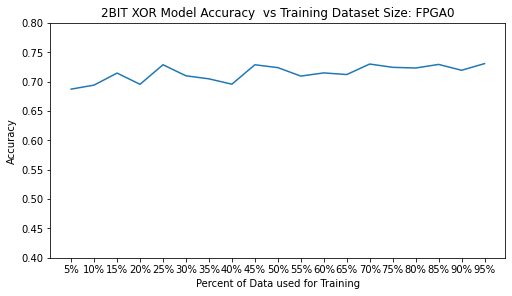

In [13]:
# get data to plot (NumPy recommended)

result = np_avg_array_fpga0_2bit_xor.mean(axis=0)
x_axis=["5%","10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%"]
# average_y_axis=[]


# figure properties
plt.figure(figsize=(7,4), constrained_layout=True)

# plots the data
plt.plot(x_axis, result)


# format your plots
plt.title("2BIT XOR Model Accuracy  vs Training Dataset Size: FPGA0")            # adds title
plt.xlabel("Percent of Data used for Training")          # adds x-axis label
plt.ylabel("Accuracy")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
plt.ylim(0.40, 0.80)             # sets y-axis min/max values


# saves the plot
plt.savefig("../Figures/2bit_accuracy_vs_percent_trained_fpga0.pdf") # PDF recommended


# show the plot on your screen
plt.show()




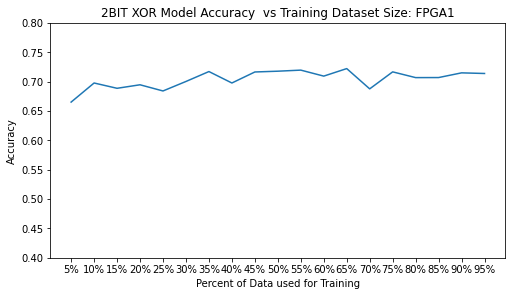

In [14]:
# get data to plot (NumPy recommended)

result = np_avg_array_fpga1_2bit_xor.mean(axis=0)
x_axis=["5%","10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%"]
# average_y_axis=[]


# figure properties
plt.figure(figsize=(7,4), constrained_layout=True)

# plots the data
plt.plot(x_axis, result)


# format your plots
plt.title("2BIT XOR Model Accuracy  vs Training Dataset Size: FPGA1")            # adds title
plt.xlabel("Percent of Data used for Training")          # adds x-axis label
plt.ylabel("Accuracy")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
plt.ylim(0.40, 0.80)           # sets y-axis min/max values


# saves the plot
plt.savefig("../Figures/2bit_accuracy_vs_percent_trained_fpga1.pdf") # PDF recommended


# show the plot on your screen
plt.show()



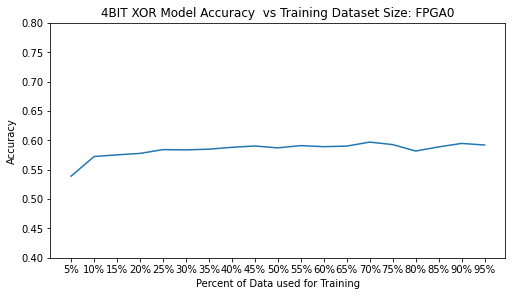

In [12]:
# get data to plot (NumPy recommended)

result = np_avg_array_fpga0_4bit_xor.mean(axis=0)
x_axis=["5%","10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%"]
# average_y_axis=[]


# figure properties
plt.figure(figsize=(7,4), constrained_layout=True)

# plots the data
plt.plot(x_axis, result)


# format your plots
plt.title("4BIT XOR Model Accuracy  vs Training Dataset Size: FPGA0")            # adds title
plt.xlabel("Percent of Data used for Training")          # adds x-axis label
plt.ylabel("Accuracy")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
plt.ylim(0.40, 0.80)             # sets y-axis min/max values


# saves the plot
plt.savefig("../Figures/4bit_accuracy_vs_percent_trained_fpga0.pdf") # PDF recommended


# show the plot on your screen
plt.show()


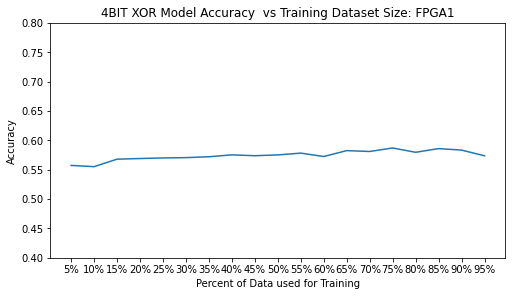

In [15]:
# get data to plot (NumPy recommended)

result = np_avg_array_fpga1_4bit_xor.mean(axis=0)
x_axis=["5%","10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%"]
# average_y_axis=[]


# figure properties
plt.figure(figsize=(7,4), constrained_layout=True)

# plots the data
plt.plot(x_axis, result)

# format your plots
plt.title("4BIT XOR Model Accuracy  vs Training Dataset Size: FPGA1")            # adds title
plt.xlabel("Percent of Data used for Training")          # adds x-axis label
plt.ylabel("Accuracy")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
plt.ylim(0.40, 0.80)             # sets y-axis min/max values


# saves the plot
plt.savefig("../Figures/4bit_accuracy_vs_percent_trained_fpga1.pdf") # PDF recommended


# show the plot on your screen
plt.show()

